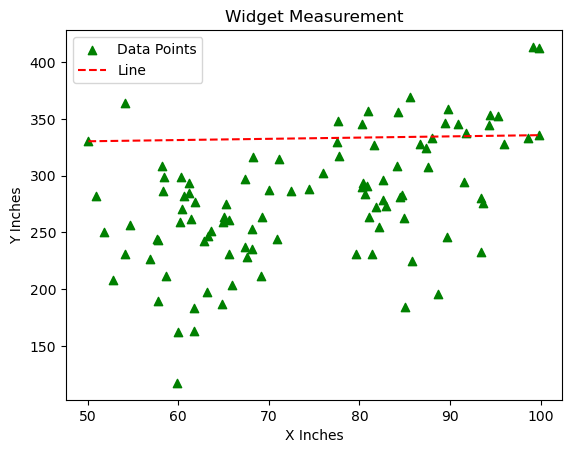

In [1]:
# Question 1
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/scatter_data.csv')

x = data.iloc[:, 0]  # Assuming 'x' data is in the first column
y = data.iloc[:, 1]  # Assuming 'y' data is in the second column

plt.scatter(x, y, marker='^', color='green', label='Data Points')

min_x = x.min()
max_x = x.max()

plt.plot([min_x, max_x], [y[x.idxmin()], y[x.idxmax()]], linestyle='--', color='red', label='Line')

plt.title('Widget Measurement')

plt.xlabel('X Inches')
plt.ylabel('Y Inches')

plt.legend()

plt.show()

In [4]:
#Question 2
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/student_grades.csv')

In [5]:
selected_columns = data.iloc[:, [0, 1]]

# Specify the bins and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

In [6]:
selected_columns['Grade'] = pd.cut(selected_columns.iloc[:, 1], bins=bins, labels=labels, right=False)

In [7]:
# Count the number of students in each grade category
grade_counts = selected_columns[ 'Grade'].value_counts().reindex(labels)

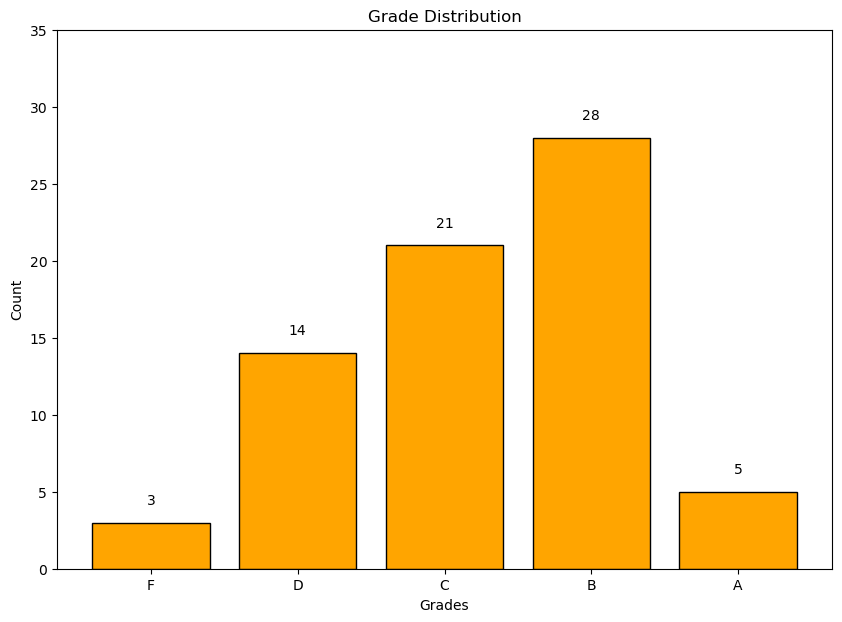

In [8]:
# Create the histogram
plt.figure(figsize=(10, 7))
plt.bar(labels, grade_counts, color='orange', edgecolor='black')

for i, count in enumerate(grade_counts):
    plt.text(i, min(count + 1, 35), str(count), ha='center', va='bottom')  # Reduce the gap to 2

plt.xlabel('Grades')
plt.ylabel('Count')  # Updated Y-axis label

plt.title('Grade Distribution')

plt.ylim(0, 35)

plt.show()

In [9]:
#Question 3
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/PRANAV/OneDrive/Desktop/Programming Analytics/solution_data.csv')

In [10]:
df['gap'] = df.groupby('% Problem')['Value'].transform(max) - df['Value']
df['gap_percent'] = (df['gap'] / df.groupby('% Problem')['Value'].transform(max)) * 100

In [11]:
heuristic_df = df[df['SolnMethod'] != 'optimal']

In [12]:
avg_gaps = heuristic_df.groupby('SolnMethod')['gap_percent'].mean().reset_index()

In [13]:
boxplot_data = heuristic_df.groupby('SolnMethod')['gap_percent'].apply(list).reset_index(name='gaps')

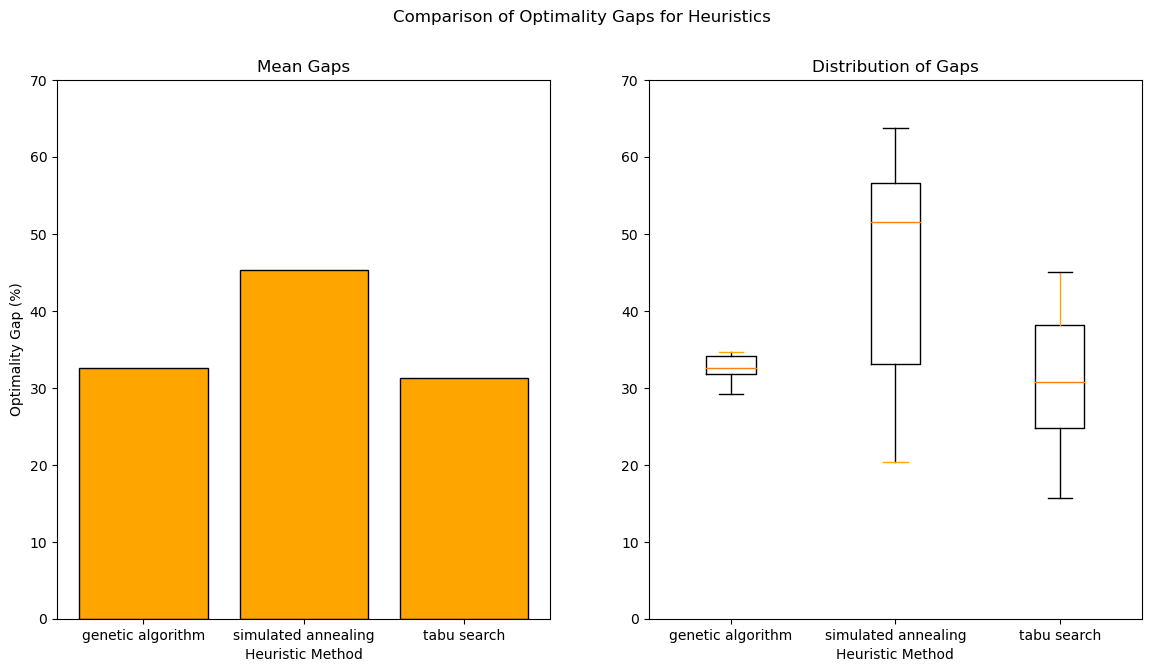

In [14]:
plt.figure(figsize=(14, 7))

# Barplot
plt.subplot(1, 2, 1)
plt.bar(avg_gaps['SolnMethod'], avg_gaps['gap_percent'], color='orange', edgecolor='black')
plt.xlabel('Heuristic Method')
plt.ylabel('Optimality Gap (%)')
plt.title('Mean Gaps')
plt.ylim(0, 70)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(boxplot_data['gaps'], labels=boxplot_data['SolnMethod'])
plt.xlabel('Heuristic Method')
plt.title('Distribution of Gaps')
plt.ylim(0, 70)


for median in plt.gca().lines[4::6]:
    median.set_color('orange')

plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.show()

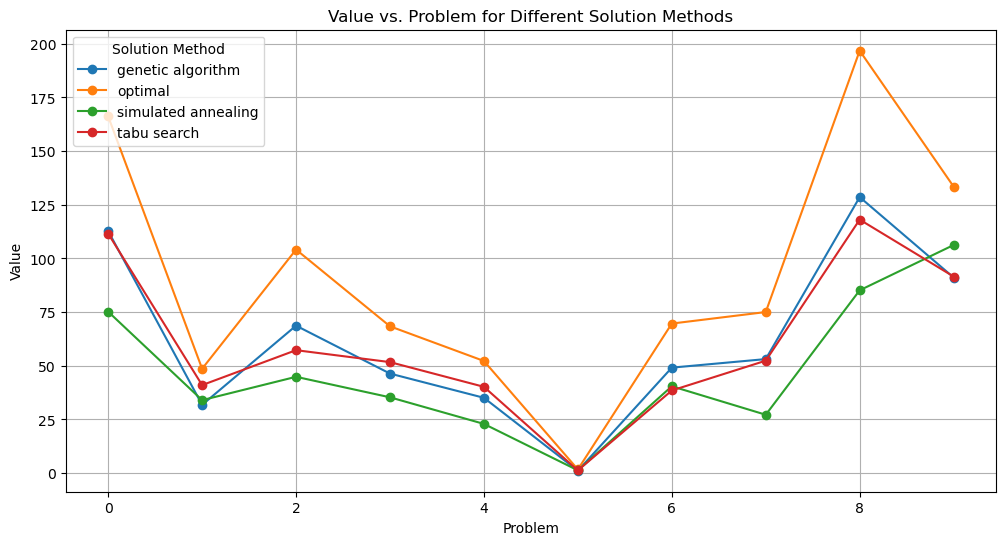

In [15]:
# Question 4
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Problem': [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9],
    'SolnMethod': ['genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal',
                   'genetic algorithm', 'simulated annealing', 'tabu search', 'optimal'],
    'Value': [112.74986, 75.220917, 111.574225, 166.170172,
              31.819762, 34.014603, 41.022612, 48.63447,
              68.7092, 44.886988, 57.290797, 104.148106,
              46.387311, 35.335046, 51.727828, 68.404717,
              35.103455, 22.944971, 40.21729, 52.252706,
              1.140533, 1.317559, 1.287446, 1.733297,
              49.154174, 40.475277, 38.517719, 69.682901,
              53.138807, 27.211498, 52.395275, 75.051565,
              128.584705, 85.175769, 118.097886, 196.772564,
              91.139572, 106.274723, 91.585159, 133.472658]
})

# Create a line plot
plt.figure(figsize=(12, 6))
for method, group in data.groupby('SolnMethod'):
    plt.plot(group['Problem'], group['Value'], marker='o', label=method)

plt.xlabel('Problem')
plt.ylabel('Value')
plt.title('Value vs. Problem for Different Solution Methods')
plt.legend(title='Solution Method', loc='upper left')
plt.grid(True)
plt.show()




In [17]:
#Explanation:
#X-Axis (Problem ID): The x-axis indicates the "Problem ID," which is a numerical identification for various situations or scenarios. Each tick on the x-axis represents a distinct problem or circumstance.

#Y-Axis (Value): The y-axis represents the "Value," which is a numerical measure associated with each problem. It could be a performance metric, cost, or any other measure that varies across problems.

#Lines for Solution Methods: There are a number of lines in the graph, each corresponding to a different "Solution Method." The solution approaches are distinguished by the varying line colours and markers.

#Data Points: The markers (usually circles in this case) on each line represent the actual data points. Each data point indicates the "Value" for a specific problem ID and solution method.

In [18]:
#By observing the lines for different solution methods, we can compare their performance across different problems. For example, we can see that the "optimal" solution method tends to have the highest "Value" across most problems, indicating its effectiveness.

In [ ]:
#Source of the data- "C:\Users\PRANAV\OneDrive\Desktop\Programming Analytics\solution_data.csv"
# Plot type- 